In [15]:
# Mengaktifkan tampilan grafik di dalam notebook
%matplotlib inline

# Impor library-library yang diperlukan

import numpy as np
# NumPy adalah library untuk komputasi numerik. Ini digunakan untuk operasi matematika dan manipulasi array.

import pandas as pd
# Pandas adalah library untuk manipulasi dan analisis data. Ini menyediakan struktur data seperti DataFrame untuk bekerja dengan data tabular.

import matplotlib.pyplot as plt
# Matplotlib adalah library untuk membuat grafik dan visualisasi data.

# import seaborn as sns
# # Seaborn adalah library berbasis Matplotlib yang mempermudah pembuatan visualisasi data statistik yang menarik.

"""
Model/Algoritma
"""

from sklearn.ensemble import RandomForestClassifier


#MinMaxScaler untuk Normalisasi
from sklearn.preprocessing import MinMaxScaler

# Split dataset latih dan test
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
# Confusion Matrix digunakan untuk mengevaluasi hasil dari klasifikasi model.

from sklearn.metrics import classification_report
# Classification Report memberikan laporan kualitas hasil klasifikasi.

from sklearn.preprocessing import LabelEncoder
# LabelEncoder digunakan untuk mengubah label kategori menjadi angka.

# from sklearn.model_selection import StratifiedKFold
# StratifiedKFold digunakan untuk validasi silang berdasarkan lipatan (folds) yang mempertahankan proporsi kelas.

import warnings
# Warnings digunakan untuk mengabaikan peringatan yang mungkin muncul selama eksekusi kode.
warnings.filterwarnings('ignore')

### dataset telekomunikasi yang tampaknya berkaitan dengan pelanggan dan perilaku churn (berhenti menggunakan layanan). Setiap baris mewakili informasi pelanggan

In [16]:
data = pd.read_csv("//Users//arlinaaryaputri//Documents//Dataset//train.csv")
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [17]:
print("Dataset shape:", data.shape)

Dataset shape: (4250, 20)


In [18]:
list(data.columns.tolist())

['state',
 'account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [20]:
data.duplicated().any()

False

In [21]:
data.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [22]:
data.columns = map(str.lower, data.columns)
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [161]:
# print(f"{data['state'].value_counts()}\n")
print(f"{data['international_plan'].value_counts()}\n")
print(f"{data['area_code'].value_counts()}\n")
print(f"{data['voice_mail_plan'].value_counts()}\n")


international_plan
0    3854
1     396
Name: count, dtype: int64

area_code
1    2108
0    1086
2    1056
Name: count, dtype: int64

voice_mail_plan
0    3138
1    1112
Name: count, dtype: int64



In [60]:
object_cols = data.select_dtypes(include=['object']).columns
for col in object_cols:
    data[col] = data[col].replace('No', 'Tidak')

In [56]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,Tidak,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,Tidak,Tidak,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,Yes,Tidak,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,Yes,Tidak,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,Tidak,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,Tidak,Tidak,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,Tidak,Tidak,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,Tidak,Tidak,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,Tidak,Yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [162]:
# print(f"{data['state'].value_counts()}\n")
print(f"{data['international_plan'].value_counts()}\n")
print(f"{data['area_code'].value_counts()}\n")
print(f"{data['voice_mail_plan'].value_counts()}\n")

international_plan
0    3854
1     396
Name: count, dtype: int64

area_code
1    2108
0    1086
2    1056
Name: count, dtype: int64

voice_mail_plan
0    3138
1    1112
Name: count, dtype: int64



In [62]:
data['churn'].value_counts()


churn
no     3652
yes     598
Name: count, dtype: int64

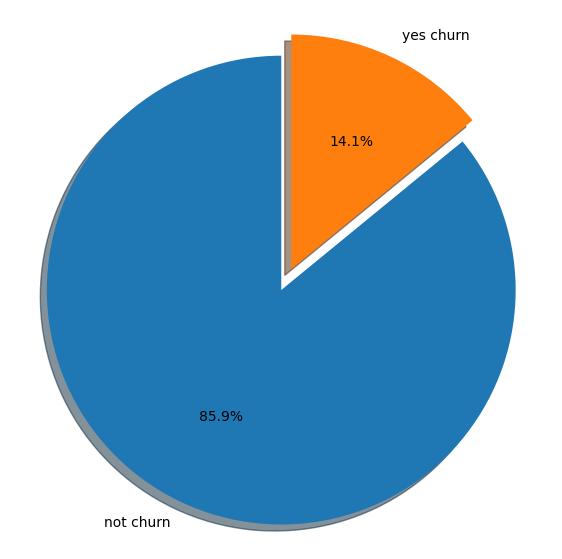

In [63]:
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(data["churn"].value_counts(),labels=('not churn','yes churn'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()

##### Exploring Categorical Features


In [75]:
def plot_cat(data, feature, xlabel_rotation=0):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    # Set title for the first subplot (non-churn customers)
    ax[0].set(xlabel=f"{feature}", ylabel="Number of Customers")
    # Set title for the second subplot (churn customers)
    ax[1].set(xlabel=f"{feature}", ylabel="Number of Customers")
    
    # Plot for non-churn customers
    data[data.churn == "no"][feature].value_counts().plot(kind='bar', ax=ax[0], rot=xlabel_rotation).set_title('Non-churn Customers')
    # Plot for churn customers
    data[data.churn == "yes"][feature].value_counts().plot(kind='bar', ax=ax[1], rot=xlabel_rotation).set_title('Churn Customers')
    
    # Main title
    fig.suptitle(f'{feature} Distribution in Customer Attrition', y=1.02, size=16, weight='bold')
    plt.tight_layout()
    plt.show()

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [76]:
# Define categorical and numerical features based on your data
categorical_features = ['state', 'area_code', 'international_plan', 'voice_mail_plan']
numerical_features = ['account_length', 'number_vmail_messages', 'total_day_minutes', 
                      'total_day_calls', 'total_day_charge', 'total_eve_minutes', 
                      'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 
                      'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
                      'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

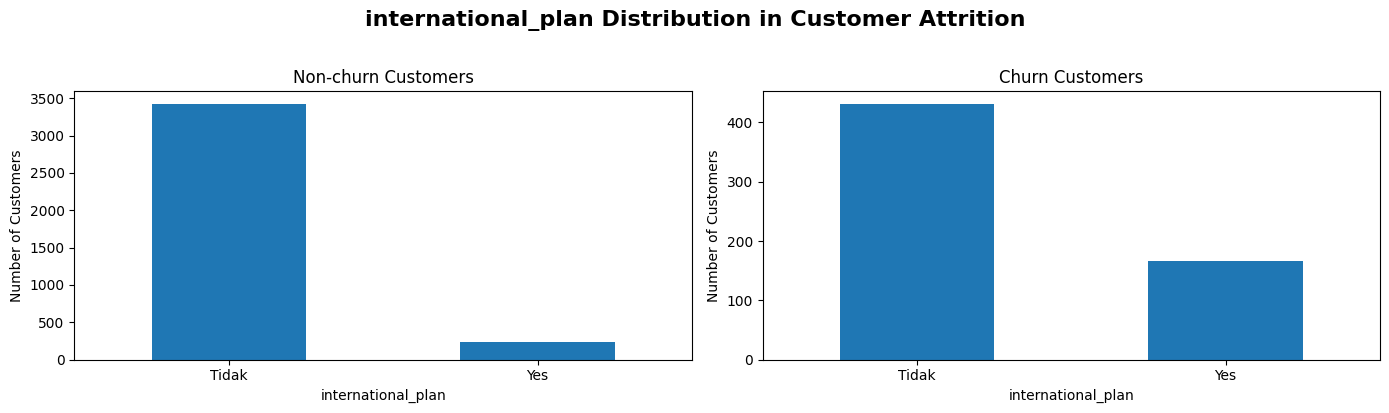

In [77]:
plot_cat(data, 'international_plan')

### Pelanggan yang tidak menggunakan paket internasional lebih banyak dibandingkan yang menggunakannya, baik untuk churn maupun non-churn.
### Namun, pelanggan yang menggunakan paket internasional cenderung memiliki proporsi churn yang lebih tinggi dibandingkan yang tidak menggunakannya.

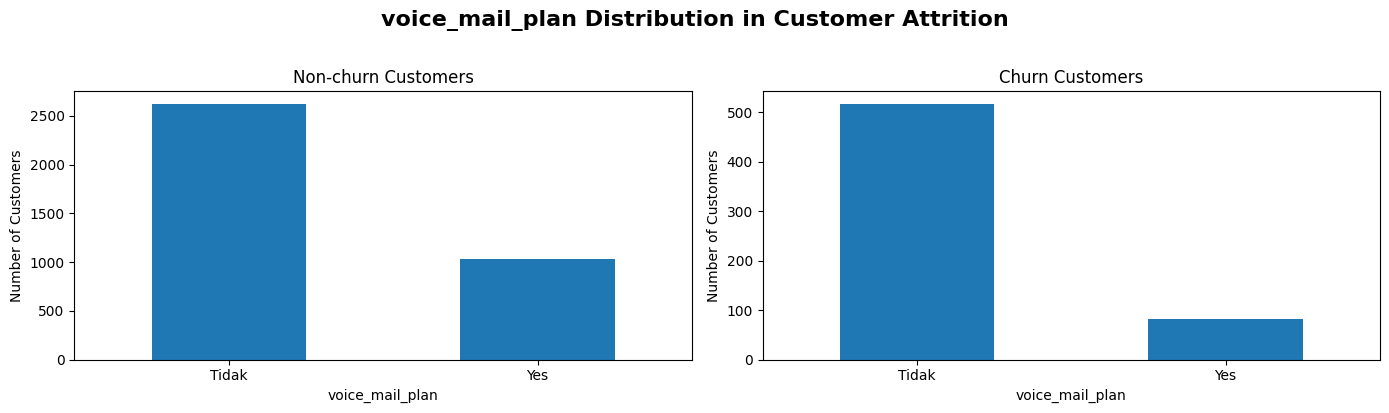

In [79]:
plot_cat(data, 'voice_mail_plan')


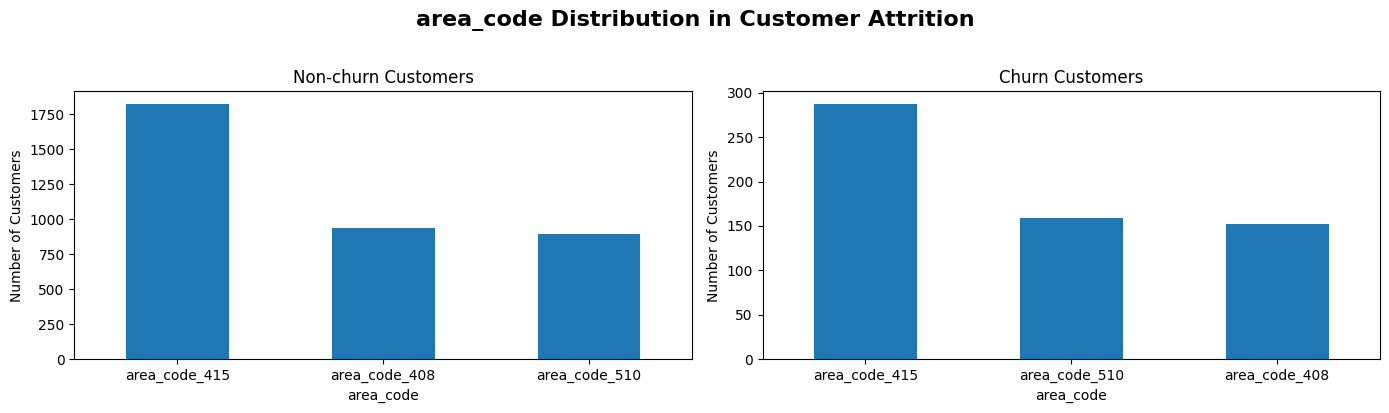

In [80]:
plot_cat(data, 'area_code')


### Sebagian besar pelanggan tidak memiliki paket pesan suara (voice mail), dan tren ini terlihat baik pada pelanggan churn maupun non-churn.
### Pelanggan yang memiliki paket pesan suara cenderung lebih sedikit mengalami churn dibandingkan yang tidak memiliki paket tersebut.

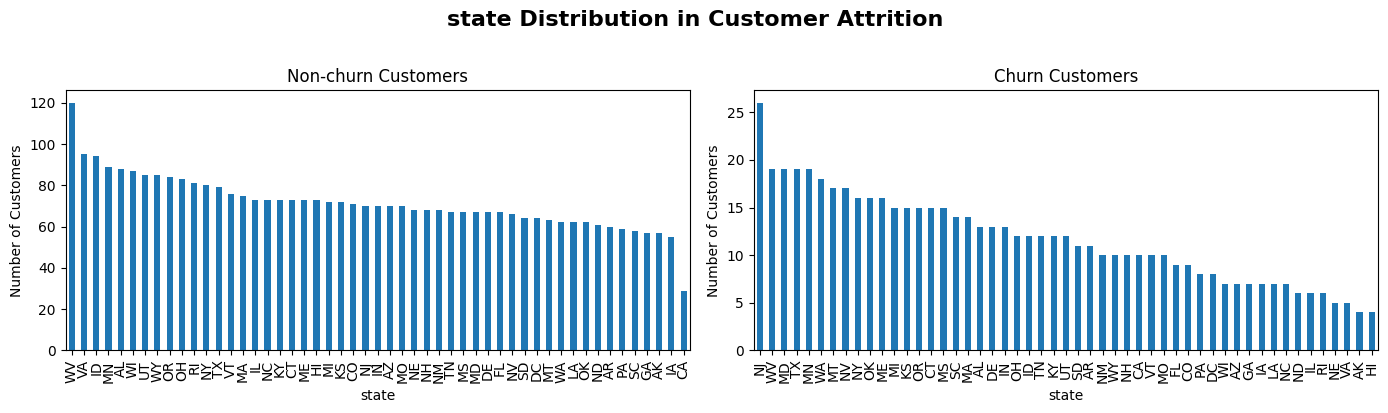

In [81]:
plot_cat(data, 'state', xlabel_rotation=90)


### Faktor-faktor layanan seperti durasi akun yang singkat dan penggunaan layanan tertentu (misalnya, paket internasional) tampaknya mempengaruhi kecenderungan pelanggan untuk churn.

### Pelanggan churn cenderung memiliki karakteristik yang berbeda dari pelanggan non-churn dalam hal penggunaan layanan dan lama berlangganan. Ini bisa menjadi sinyal penting bagi perusahaan untuk memfokuskan strategi retensi pelanggan, terutama bagi mereka yang baru bergabung atau menggunakan layanan yang lebih intensif.

### Exploring Numeric Features

In [90]:
numerical_features = ['account_length', 'total_day_minutes', 'total_eve_minutes']

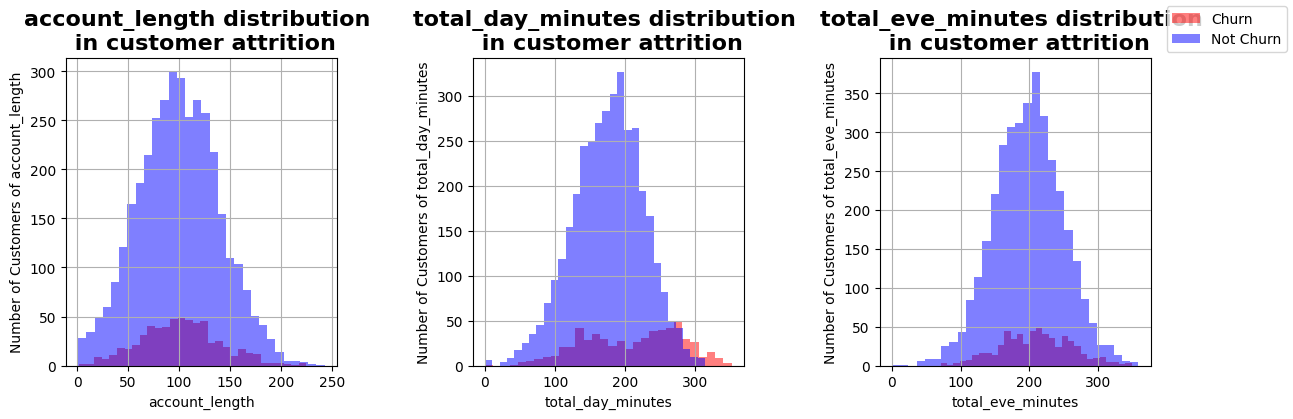

In [91]:
fig, ax = plt.subplots(1, len(numerical_features), figsize=(14, 4))
fig.subplots_adjust(wspace=.5)

for feature,i in zip(numerical_features,range(len(numerical_features))):
    ax[i].set(xlabel = f"{feature}", ylabel=f"Number of Customers of {feature}")
    ax[i].set_title(f'{feature} distribution \n in customer attrition',size=16, weight='bold')
    data[data.churn == "yes"][feature].hist(bins=30, color="red", alpha=0.5, ax=ax[i])
    data[data.churn == "no"][feature].hist(bins=30, color="blue", alpha=0.5, ax=ax[i])


fig.legend(["Churn","Not Churn"])

> 1. Distribusi account_length (durasi akun)
Grafik ini menunjukkan distribusi durasi akun untuk pelanggan churn dan non-churn.
Pelanggan non-churn (warna biru) memiliki distribusi yang lebih lebar, dengan puncak durasi akun di sekitar 100 hingga 150 hari.
Pelanggan churn (warna merah) juga memiliki distribusi yang mirip tetapi lebih terkonsentrasi pada durasi akun yang lebih pendek, menunjukkan bahwa pelanggan yang churn cenderung memiliki akun yang aktif lebih singkat.

> 2. Distribusi total_day_minutes (penggunaan menit siang hari)
Distribusi ini menunjukkan jumlah total menit yang digunakan pelanggan selama siang hari.
Pelanggan non-churn memiliki distribusi yang lebih tinggi di sekitar 150-200 menit, dengan lebih banyak variasi dibandingkan pelanggan churn.
Pelanggan churn memiliki distribusi yang lebih kecil dan terkonsentrasi di bawah 200 menit. Ini menunjukkan bahwa pelanggan yang churn cenderung menggunakan layanan siang hari lebih sedikit dibandingkan non-churn.

> 3. Distribusi total_eve_minutes (penggunaan menit malam hari)
Distribusi penggunaan menit malam hari menunjukkan pola yang serupa dengan penggunaan siang hari.
Pelanggan non-churn lebih dominan di sekitar 150-200 menit, sedangkan pelanggan churn terlihat memiliki distribusi yang lebih rendah dan lebih bervariasi di bawah 200 menit.
Hal ini mengindikasikan bahwa pelanggan churn menggunakan layanan telepon pada malam hari lebih sedikit dibandingkan pelanggan non-churn.

> Kesimpulan dari Visualisasi:
Pelanggan churn cenderung memiliki durasi akun yang lebih pendek dan menggunakan layanan telepon (baik siang maupun malam hari) lebih sedikit dibandingkan pelanggan non-churn.
Perusahaan dapat menggunakan informasi ini untuk mengidentifikasi pola penggunaan yang mungkin menunjukkan risiko churn dan melakukan upaya retensi untuk pelanggan dengan akun yang lebih baru atau penggunaan yang rendah.

### Mengecek Outlier

In [92]:
def find_outliers(col):
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [87]:
idx_outs = find_outliers(data['account_length']) 
idx_outs.value_counts()

False    4240
True       10
Name: count, dtype: int64

In [93]:
idx_outs = find_outliers(data['total_day_minutes']) 
idx_outs.value_counts()


False    4240
True       10
Name: count, dtype: int64

In [94]:
idx_outs = find_outliers(data['total_eve_minutes']) 
idx_outs.value_counts()

False    4237
True       13
Name: count, dtype: int64

In [95]:
import numpy as np

def detect_outliers_iqr(data, columns):
    outliers = []

    for col_name in columns:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outlier_indices = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)].index
        outliers.extend(outlier_indices)

    return list(set(outliers))

# Gunakan fungsi untuk mendeteksi outlier dalam kolom-kolom yang diinginkan
outlier_indices = detect_outliers_iqr(data, ['account_length', 'total_day_minutes', 'total_eve_minutes'])

# Tampilkan indeks dari outlier
outlier_indices

[2,
 2051,
 4,
 6,
 12,
 1036,
 2602,
 1075,
 1593,
 570,
 4157,
 3679,
 1129,
 618,
 1138,
 3707,
 1661,
 3711,
 129,
 2691,
 3717,
 3719,
 4234,
 3213,
 1683,
 4244,
 2202,
 1183,
 162,
 2725,
 1193,
 684,
 2736,
 688,
 1717,
 197,
 712,
 744,
 748,
 2289,
 256,
 1805,
 2318,
 3854,
 3345,
 1304,
 2332,
 3873,
 1828,
 2859,
 1838,
 817,
 3377,
 3381,
 3384,
 827,
 3924,
 343,
 3932,
 2921,
 877,
 885,
 1923,
 900,
 1415,
 1939,
 3494,
 2482,
 439,
 442,
 1472,
 1986,
 3524,
 479,
 997,
 486,
 4079,
 500]

#### Preprocessing Data

In [96]:
l=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

# The 'object' data type columns are transformed as follows
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


#### Seleksi Fitur

In [98]:
data.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.000000,0.008818,0.020713,0.003822,-0.034752,-0.030857,0.014263,-0.009890,0.014262,0.001603,-0.009116,0.001603,0.004827,-0.006597,0.004815,-0.010260,0.007469,-0.010284,-0.020421,0.007181
account_length,0.008818,1.000000,-0.023530,0.027050,0.001663,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
area_code,0.020713,-0.023530,1.000000,0.027133,-0.001622,-0.002468,0.006344,-0.009064,0.006342,-0.000244,-0.014031,-0.000229,0.019034,0.022869,0.019031,0.013641,-0.007027,0.013518,0.011064,0.010696
international_plan,0.003822,0.027050,0.027133,1.000000,0.000714,0.004808,0.040059,0.009776,0.040061,0.023484,-0.003004,0.023479,-0.020694,0.007153,-0.020694,0.023815,0.006956,0.023799,-0.008881,0.259053
voice_mail_plan,-0.034752,0.001663,-0.001622,0.000714,1.000000,0.954014,-0.000653,-0.010004,-0.000658,0.011982,0.000263,0.011989,0.017884,0.007872,0.017875,0.008098,-0.005674,0.008129,-0.021504,-0.114643
number_vmail_messages,-0.030857,-0.006626,-0.002468,0.004808,0.954014,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,0.014263,-0.001612,0.006344,0.040059,-0.000653,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,-0.009890,0.023002,-0.009064,0.009776,-0.010004,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,0.014262,-0.001613,0.006342,0.040061,-0.000658,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,0.001603,-0.010326,-0.000244,0.023484,0.011982,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855


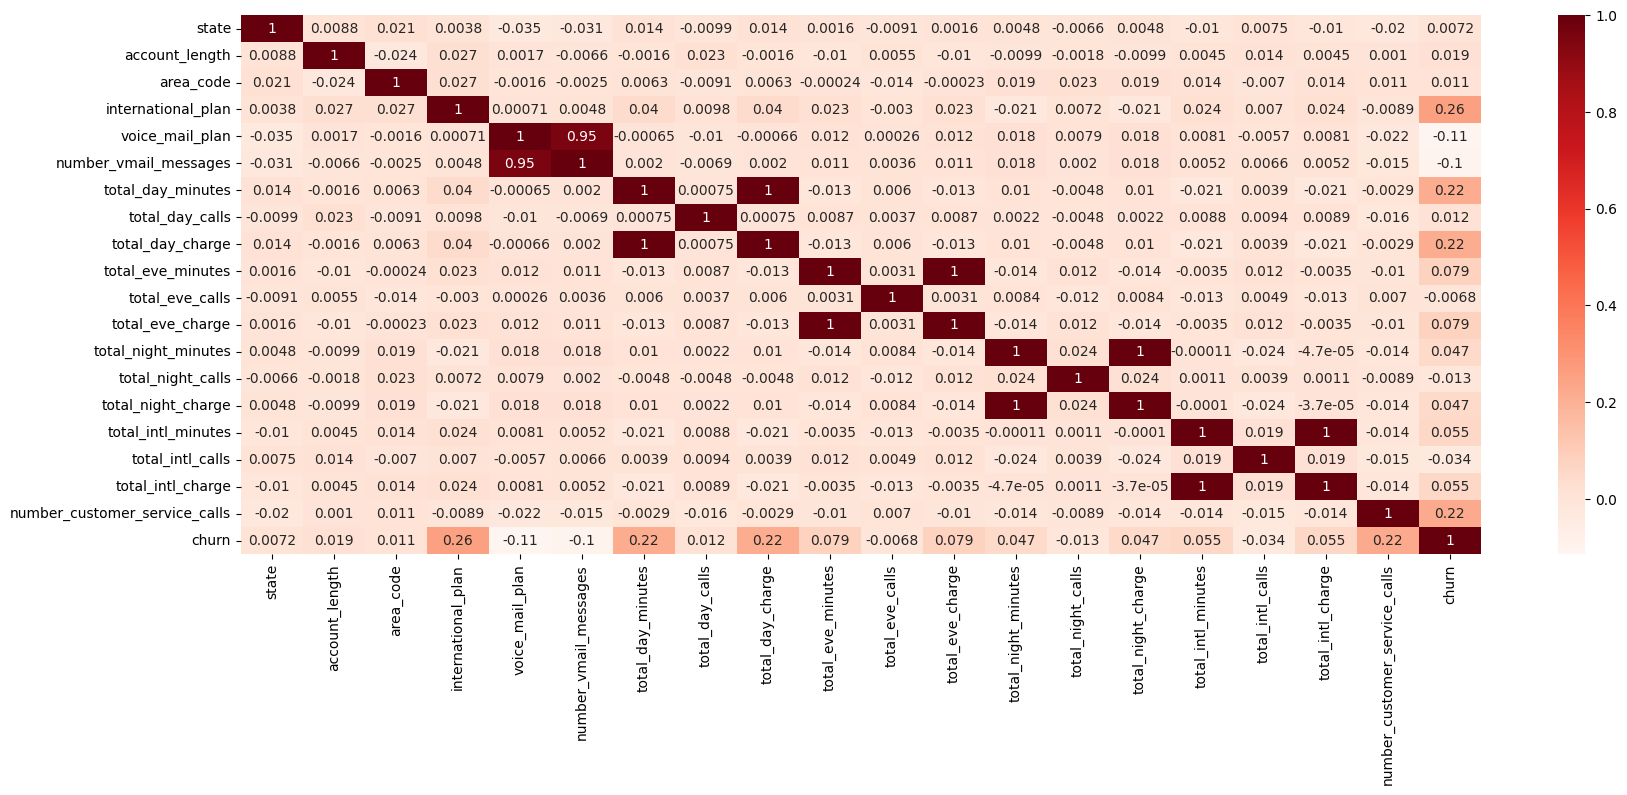

In [99]:
import seaborn as sns

plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True,cmap='Reds')
plt.show()

In [100]:
data.corr()["churn"]

state                            0.007181
account_length                   0.019378
area_code                        0.010696
international_plan               0.259053
voice_mail_plan                 -0.114643
number_vmail_messages           -0.100347
total_day_minutes                0.215272
total_day_calls                  0.011640
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_calls                 -0.006817
total_eve_charge                 0.078852
total_night_minutes              0.046647
total_night_calls               -0.012699
total_night_charge               0.046641
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
churn                            1.000000
Name: churn, dtype: float64

In [101]:
# Menghitung korelasi antara fitur dengan kolom target "churn"
correlations = data.corr()["churn"]

# Mengurutkan korelasi dari yang tertinggi ke yang terendah
sorted_correlations = correlations.sort_values(ascending=False)

# Tampilkan hasil yang sudah diurutkan
print(sorted_correlations)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
account_length                   0.019378
total_day_calls                  0.011640
area_code                        0.010696
state                            0.007181
total_eve_calls                 -0.006817
total_night_calls               -0.012699
total_intl_calls                -0.034334
number_vmail_messages           -0.100347
voice_mail_plan                 -0.114643
Name: churn, dtype: float64


> Korelasi Positif
- international_plan (0.259053)
- number_customer_service_calls (0.221220)
- total_day_minutes (0.215272)
- total_day_charge (0.215263)

> Korelasi Negatif
- voice_mail_plan (-0.114643)
- number_vmail_messages (-0.100347)
- total_intl_calls (-0.034334)
- total_night_calls (-0.012699)
- total_eve_calls (-0.006817)

In [106]:
# Kolom-kolom yang ingin di ambil
selected_columns = ['international_plan', 'number_customer_service_calls', 'total_day_minutes', 'total_day_charge', 'voice_mail_plan', 'number_vmail_messages', 'total_intl_calls', 'total_night_calls', 'total_eve_calls','churn']

# Membuat dataframe baru dengan kolom yang dipilih
new_df = data[selected_columns]
new_df.head()

,international_plan,number_customer_service_calls,total_day_minutes,total_day_charge,voice_mail_plan,number_vmail_messages,total_intl_calls,total_night_calls,total_eve_calls,churn
0,0,1,161.6,27.47,1,26,3,103,103,0
1,0,0,243.4,41.38,0,0,5,104,110,0
2,1,2,299.4,50.90,0,0,7,89,88,0
3,1,3,166.7,28.34,0,0,3,121,122,0
4,0,3,218.2,37.09,1,24,7,118,108,0


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int64  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int64  
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Split Data

In [107]:
x=new_df.drop('churn',axis=1)
y=new_df['churn']

x
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64

### memprediksi apakah pelanggan akan tetap atau berhenti menggunakan layanan.

### Random Forrest

In [140]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [141]:
# Normalisasi data
mms=MinMaxScaler(feature_range=(0,1))
xtrain=mms.fit_transform(xtrain)
xtest=mms.fit_transform(xtest)
xtrain=pd.DataFrame(xtrain)
xtest=pd.DataFrame(xtest)

xtrain
xtest

,0,1,2,3,4,5,6,7,8
0,0.0,0.111111,0.364374,0.364375,0.0,0.000000,0.2500,0.313433,0.608974
1,0.0,0.222222,0.638029,0.638099,1.0,0.510638,0.0625,0.529851,0.506410
2,0.0,0.111111,0.726044,0.726100,1.0,0.574468,0.2500,0.201493,0.570513
3,0.0,0.222222,0.740463,0.740590,0.0,0.000000,0.1875,0.432836,0.493590
4,0.0,0.333333,0.604085,0.604170,0.0,0.000000,0.1875,0.537313,0.474359
...,...,...,...,...,...,...,...,...,...
1270,0.0,0.444444,0.545509,0.545503,0.0,0.000000,0.3750,0.171642,0.679487
1271,1.0,0.222222,0.583959,0.584025,0.0,0.000000,0.4375,0.388060,0.461538
1272,1.0,0.222222,0.363172,0.363138,0.0,0.000000,0.6875,0.664179,0.487179
1273,0.0,0.333333,0.669270,0.669376,0.0,0.000000,0.1875,0.522388,0.467949


In [142]:
from sklearn.model_selection import GridSearchCV 


# Membuat model Random Forest
rf_model = RandomForestClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],  # Jumlah pohon yang ingin diuji
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(xtrain, ytrain)

# Mencetak hyperparameter terbaik
print('\n')
print("Hyperparameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


Hyperparameter terbaik: {'n_estimators': 50}


In [143]:
# Menggunakan hyperparameter terbaik yang sudah ditemukan
best_rf_model = grid_search.best_estimator_

# Melatih model dengan hyperparameter terbaik pada seluruh data pelatihan
best_rf_model.fit(xtrain, ytrain)

# Melakukan prediksi pada data validasi
y_pred = best_rf_model.predict(xtest)

from sklearn.metrics import accuracy_score


# Mengukur kinerja model pada data validasi
accuracy = accuracy_score(ytest, y_pred)
print("Akurasi pada data validasi:", accuracy)

Akurasi pada data validasi: 0.9105882352941177


Evaluasi

In [144]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1082
           1       0.75      0.61      0.67       193

    accuracy                           0.91      1275
   macro avg       0.84      0.79      0.81      1275
weighted avg       0.91      0.91      0.91      1275



In [157]:
confusion_mat = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
confusion_mat

Confusion Matrix:


array([[974, 136],
       [144,  21]])

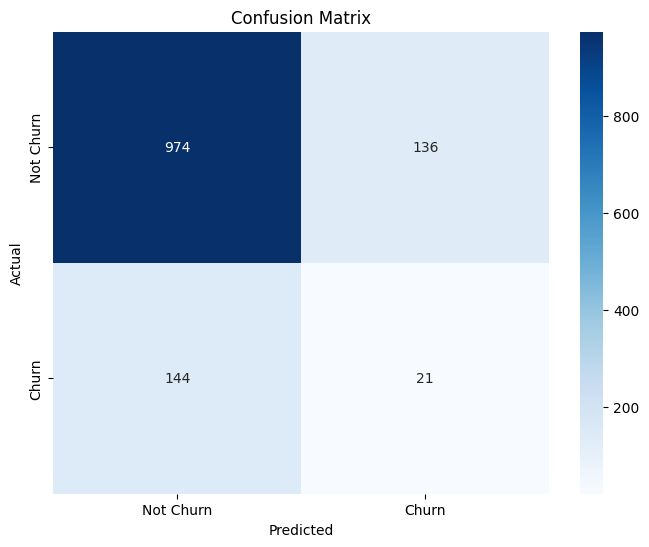

In [158]:
# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree


In [146]:
x=new_df.drop('churn',axis=1)
y=new_df['churn']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Kriteria untuk membagi node
    'max_depth': [None, 10, 20, 30, 40, 50],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Jumlah sampel minimum pada leaf node
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(xtrain, ytrain)

# Mencetak hyperparameter terbaik
print('\n')
print("Hyperparameter terbaik:", grid_search_dt.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Hyperparameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [149]:
# Menggunakan hyperparameter terbaik yang sudah ditemukan
best_dt_model = grid_search_dt.best_estimator_

# Melatih model dengan hyperparameter terbaik pada seluruh data pelatihan
best_dt_model.fit(xtrain, ytrain)

# Melakukan prediksi pada data validasi
y_pred_dt = best_dt_model.predict(xtest)

from sklearn.metrics import accuracy_score

# Mengukur kinerja model pada data validasi
accuracy_dt = accuracy_score(ytest, y_pred_dt)
print("Akurasi pada data validasi:", accuracy_dt)


Akurasi pada data validasi: 0.8815686274509804


In [151]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1069
           1       0.16      0.12      0.14       206

    accuracy                           0.75      1275
   macro avg       0.50      0.50      0.50      1275
weighted avg       0.73      0.75      0.74      1275



### KNN

In [152]:
x=new_df.drop('churn',axis=1)
y=new_df['churn']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Membuat model KNN
knn_model = KNeighborsClassifier()

# Hyperparameter tuning menggunakan GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga terdekat yang ingin diuji
    'weights': ['uniform', 'distance'],  # Cara memberikan bobot pada tetangga
    'metric': ['euclidean', 'manhattan']  # Metode perhitungan jarak
}

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(xtrain, ytrain)

# Mencetak hyperparameter terbaik
print('\n')
print("Hyperparameter terbaik:", grid_search_knn.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


Hyperparameter terbaik: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}


In [154]:
# Menggunakan hyperparameter terbaik yang sudah ditemukan
best_knn_model = grid_search_knn.best_estimator_

# Melatih model dengan hyperparameter terbaik pada seluruh data pelatihan
best_knn_model.fit(xtrain, ytrain)

# Melakukan prediksi pada data validasi
y_pred_knn = best_knn_model.predict(xtest)

from sklearn.metrics import accuracy_score

# Mengukur kinerja model pada data validasi
accuracy_knn = accuracy_score(ytest, y_pred_knn)
print("Akurasi pada data validasi:", accuracy_knn)


Akurasi pada data validasi: 0.8768627450980392


In [155]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1110
           1       0.13      0.13      0.13       165

    accuracy                           0.78      1275
   macro avg       0.50      0.50      0.50      1275
weighted avg       0.78      0.78      0.78      1275



### Insight

Berdasarkan hasil pemodelan:

> Random Forest menunjukkan kinerja terbaik** dalam hal akurasi, karena kemampuannya untuk menggabungkan prediksi dari banyak pohon keputusan dan mengurangi variansi. Ini membuat model lebih tahan terhadap overfitting dan lebih kuat dalam menangani berbagai jenis data.

> Decision Tree memberikan hasil yang memadai, tetapi rentan terhadap overfitting, terutama pada dataset besar, jika tidak dipangkas dengan tepat.

> KNN memberikan kinerja yang lebih rendah dibandingkan dengan Random Forest dan Decision Tree, terutama karena sensitivitasnya terhadap ukuran dataset dan ketergantungannya pada jarak.

### 1. Pelanggan dengan Kontrak Bulanan Berisiko Tinggi untuk Churn
Berdasarkan pola umum dalam analisis churn, pelanggan dengan kontrak bulanan seringkali lebih mungkin untuk churn dibandingkan dengan pelanggan yang memiliki kontrak jangka panjang (tahunan atau dua tahunan). Ini disebabkan fleksibilitas yang lebih tinggi bagi pelanggan bulanan untuk meninggalkan layanan tanpa penalti.

### 2. Biaya Bulanan yang Tinggi Berhubungan dengan Pelanggan Churn
Biaya bulanan (monthly charges) yang tinggi seringkali menjadi faktor yang berkontribusi terhadap churn. Pelanggan yang membayar lebih untuk layanan mungkin merasa bahwa mereka tidak mendapatkan nilai yang sesuai dengan biaya yang mereka keluarkan, sehingga cenderung beralih ke penyedia layanan lain yang lebih murah.

### masukkan

1. 